In [1]:
import pandas as pd 
import numpy as np
import sys
import time
import string

In [2]:
data=pd.read_csv('dataset.csv',encoding='ISO-8859-1')

In [3]:
x=data['SentimentText'][0:20000]
y=data['Sentiment'][0:20000]
data['SentimentText'][0:10]

0    first think another Disney movie, might good, ...
1    Put aside Dr. House repeat missed, Desperate H...
2    big fan Stephen King's work, film made even gr...
3    watched horrid thing TV. Needless say one movi...
4    truly enjoyed film. acting terrific plot. Jeff...
5    memory "The Last Hunt" stuck since saw 1956 13...
6    Shakespeare fan, appreciate Ken Branagh done b...
7    privilege watching Scarface big screen beautif...
8    real classic. shipload sailors trying get town...
9    Serials short subjects originally shown theate...
Name: SentimentText, dtype: object

In [4]:
data.head()

,SentimentText,Sentiment
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
!pip install keras

In [ ]:
!python -m pip install --upgrade pip

In [7]:
# !pip install nltk
import nltk
from nltk.corpus import stopwords
import re                        
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# TEXT PRE-PROCESSING

In [8]:
def text_process(mess):
    return_text=[]
    stemmer=PorterStemmer()
    lem=WordNetLemmatizer()
    nopunc = re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*','', mess, flags=re.MULTILINE)
    nopunc=[char for char in nopunc if char not in string.punctuation+'0123456789']
    nopunc=''.join(nopunc)
    nopunc=[word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    for x in nopunc:
        y=(lem.lemmatize(x))
        return_text.append(stemmer.stem(y))
    return np.unique(return_text)

In [ ]:
!pip install keras

In [ ]:
!python -m pip install --upgrade pip

# ANN

In [9]:
import keras

Using TensorFlow backend.


In [10]:
import string

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [13]:
tic=time.time()

bow_transformer=CountVectorizer(min_df=3,analyzer=text_process).fit(xtrain)
review_bow = bow_transformer.transform(xtrain)
tfidf_transformer=TfidfTransformer().fit(review_bow)
data_tfidf=tfidf_transformer.transform(review_bow)


toc=time.time()
print(1000*(toc-tic))

1831941.213130951


In [14]:
data_tfidf.shape[1]

22591

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [15]:
classifier=Sequential()
classifier.add(Dense(output_dim=64,init='uniform',activation='relu',input_dim=data_tfidf.shape[1]))
classifier.add(Dropout(p=0.25))
classifier.add(Dense(output_dim=8,init='uniform',activation='relu'))
classifier.add(Dense(output_dim=64,init='uniform',activation='relu'))
classifier.add(Dropout(p=0.25))
classifier.add(Dense(output_dim=8,init='uniform',activation='relu'))
classifier.add(Dense(output_dim=64,init='uniform',activation='relu'))
classifier.add(Dropout(p=0.2))
classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(data_tfidf,ytrain,batch_size=20,epochs=25)

C:\Users\prince chauhan\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=22591, activation="relu", kernel_initializer="uniform", units=64)`
  
C:\Users\prince chauhan\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.25)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\prince chauhan\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_initializer="uniform", units=8)`
  after removing the cwd from sys.path.
C:\Users\prince chauhan\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_initializer="uniform", units=64)`
  """
C:\Users\

Epoch 1/25
16000/16000 [==============================] - 28s 2ms/step - loss: 0.6932 - acc: 0.4965
Epoch 2/25
16000/16000 [==============================] - 27s 2ms/step - loss: 0.5289 - acc: 0.6804
Epoch 3/25
16000/16000 [==============================] - 28s 2ms/step - loss: 0.2066 - acc: 0.9243
Epoch 4/25
16000/16000 [==============================] - 28s 2ms/step - loss: 0.0789 - acc: 0.9735
Epoch 5/25
16000/16000 [==============================] - 28s 2ms/step - loss: 0.0258 - acc: 0.9921
Epoch 6/25
16000/16000 [==============================] - 28s 2ms/step - loss: 0.0081 - acc: 0.9971: 0s - loss: 0.0078 - ac
Epoch 7/25
16000/16000 [==============================] - 28s 2ms/step - loss: 0.0041 - acc: 0.9987
Epoch 8/25
16000/16000 [==============================] - 28s 2ms/step - loss: 0.0023 - acc: 0.9992
Epoch 9/25
16000/16000 [==============================] - 28s 2ms/step - loss: 0.0016 - acc: 0.9993
Epoch 10/25
16000/16000 [==============================] - 28s 2ms/step - lo

In [16]:
rev_bow_test= bow_transformer.transform(xtest)
tfidf_predict=tfidf_transformer.transform(rev_bow_test)

In [55]:
y_pred_ann=classifier.predict(tfidf_predict)
y_pred_ann=(y_pred_ann>0.5)
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(ytest,y_pred_ann))
print("confusion matrix: ")
print (confusion_matrix(ytest,y_pred_ann))
a1=((1755+1700)/4000)*100
"accuracy of Artificial Neural Network: "+str(a1)

             precision    recall  f1-score   support

          0       0.86      0.88      0.87      2004
          1       0.87      0.85      0.86      1996

avg / total       0.86      0.86      0.86      4000

confusion matrix: 
[[1755  249]
 [ 296 1700]]


'accuracy of Artificial Neural Network: 86.375'

# NAIVE BAYES

In [56]:
 from sklearn.naive_bayes import MultinomialNB
review_detect_model=MultinomialNB()
review_detect_model.fit(data_tfidf,ytrain)
# pred=review_detect_model.predict(data_tfidf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [58]:
y_pred_naive=review_detect_model.predict(tfidf_predict)
y_pred_naive=(y_pred_naive>0.5)
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(ytest,y_pred_naive))
print("confusion matrix: ")
print (confusion_matrix(ytest,y_pred_naive))
a2=((1743+1667)/4000)*100
"accuracy of naive bayes classifier: "+str(a2)

             precision    recall  f1-score   support

          0       0.84      0.87      0.86      2004
          1       0.86      0.84      0.85      1996

avg / total       0.85      0.85      0.85      4000

confusion matrix: 
[[1743  261]
 [ 329 1667]]


'accuracy of naive bayes classifier: 85.25'

# random_forest

In [59]:
##### random forest #####
from sklearn.ensemble import RandomForestClassifier
review_detect_model2=RandomForestClassifier()
review_detect_model2.fit(data_tfidf,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
y_pred_rfc=review_detect_model2.predict(tfidf_predict)
y_pred_rfc=(y_pred_rfc>0.5)
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(ytest,y_pred_rfc))
print("confusion matrix:")
print (confusion_matrix(ytest,y_pred_rfc))
a3=((1628+1363)/4000)*100
"accuracy of Random Forest classifier: "+str(a3)

             precision    recall  f1-score   support

          0       0.72      0.81      0.76      2004
          1       0.78      0.68      0.73      1996

avg / total       0.75      0.75      0.75      4000

confusion matrix:
[[1628  376]
 [ 633 1363]]


'accuracy of Random Forest classifier: 74.775'

# SUPPORT VECTOR MACHINES

In [62]:
from sklearn.svm import SVC
review_detect_model3=SVC()
review_detect_model3.fit(data_tfidf,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
y_pred_svc=review_detect_model3.predict(tfidf_predict)
y_pred_svc=(y_pred_svc>0.5)
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(ytest,y_pred_svc))
print("confusion matrix:")
print (confusion_matrix(ytest,y_pred_svc))
# a3=((817+659)/2000)*100
# "accuracy of Random Forest classifier: "+str(a3)

             precision    recall  f1-score   support

          0       0.50      1.00      0.67      2004
          1       0.00      0.00      0.00      1996

avg / total       0.25      0.50      0.33      4000

confusion matrix:
[[2004    0]
 [1996    0]]


C:\Users\prince chauhan\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
# from sklearn.grid_search import GridSearchCV
# # params={'C':[1,10,100],'gamma':[0.01,0.001,0.0001]}
# params={'C':[100],'gamma':[0.0001]}

grid=GridSearchCV(SVC(),params,verbose=3,n_jobs=-1)
grid.fit(data_tfidf,ytrain)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [100], 'gamma': [0.0001]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=3)

In [66]:
grid.best_params_
pred4=grid.predict(tfidf_predict)

In [68]:
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(ytest,pred4))
print("confusion matrix:")
print (confusion_matrix(ytest,pred4))
a4=((1389+1851)/4000)*100
"accuracy of Support Vector Machine Classifier: "+str(a4)

             precision    recall  f1-score   support

          0       0.91      0.69      0.79      2004
          1       0.75      0.93      0.83      1996

avg / total       0.83      0.81      0.81      4000

confusion matrix:
[[1389  615]
 [ 145 1851]]


'accuracy of Support Vector Machine Classifier: 81.0'

In [84]:
!pip install seaborn

In [69]:
import seaborn as sns
%matplotlib inline

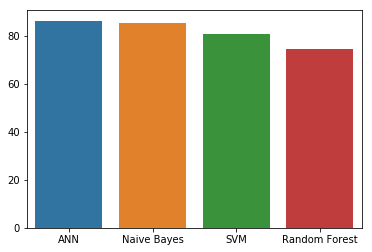

In [70]:
sns.barplot(x=["ANN",'Naive Bayes','SVM','Random Forest'],y=[a1,a2,a4,a3]);

# CHECKING A RAW REVIEW

In [25]:
#LOAD ONE FILE
# filename = 'dataext/data/train/train5905.txt'
# # open the file as read only
# file = open(filename, 'r')
# # read all text
# rev = file.read()
# # close the file
# file.close()
rev_bow = bow_transformer.transform(["i love you but somwhat it is not that much good"])
tfidf4=tfidf_transformer.transform(rev_bow)
y1=grid.predict(tfidf4)
if y1[0]>0.5:
    print('positive')
else:
    print('negative')

positive


# INCREASING NEURAL NETWORK ACCURACY

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():    
    classifier=Sequential()
    classifier.add(Dwense(output_dim=64,init='uniform',activation='relu',input_dim=review_bow.shape[1]))
    classifier.add(Dense(output_dim=64,init='uniform',activation='relu'))
    classifier.add(Dense(output_dim=64,init='uniform',activation='relu'))
    classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))                                                      
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])                                         
    return classifier
classifier=KerasClassifier(build_fn=build_classifier,batch_size=10,epochs=100)
accuracies=cross_val_score(estimator=classifier,X=data_tfidf,y=y[0:2000],cv=10,n_jobs=2)


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
def build_classifier():    
    classifier=Sequential()
    classifier.add(Dense(output_dim=64,init='uniform',activation='relu',input_dim=review_bow.shape[1]))
    classifier.add(Dropout(p=0.2))
    classifier.add(Dense(output_dim=64,init='uniform',activation='relu'))
    classifier.add(Dropout(p=0.2))
    classifier.add(Dense(output_dim=64,init='uniform',activation='relu'))
    classifier.add(Dropout(p=0.2))
    classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))                                                      
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])                                         
    return classifier
classifier=KerasClassifier(build_fn=build_classifier,batch_size=10,epochs=100)
accuracies=cross_val_score(estimator=classifier,X=data_tfidf,y=y[0:2000],cv=10,n_jobs=-1)

In [21]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
def build_classifier():    
    classifier=Sequential()
    classifier.add(Dense(output_dim=64,init='uniform',activation='relu',input_dim=review_bow.shape[1]))
    classifier.add(Dense(output_dim=64,init='uniform',activation='relu'))
    classifier.add(Dense(output_dim=64,init='uniform',activation='relu'))
    classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))                                                      
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])                                         
    return classifier
classifier=KerasClassifier(build_fn=build_classifier,batch_size=10,epochs=100)
parameters={
    'batch_size':[25,35],
    'epochs':[100,500]
}
grid_search=GridSearchCV(estimator=classifier,
                        param_grid=parameters,
                        cv=10)
grid_search=grid_search.fit(data_tfidf,y[0:2000])
best_parameters=grid_search.best_params_
best_accuracy=grid_search.best_score_

C:\Users\prince chauhan\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform", input_dim=2000)`
  
C:\Users\prince chauhan\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\prince chauhan\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\prince chauhan\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # Th

Epoch 1/100
1800/1800 [==============================] - 1s 700us/step - loss: 0.6852 - acc: 0.6022
Epoch 2/100
1800/1800 [==============================] - 0s 185us/step - loss: 0.3681 - acc: 0.8822
Epoch 3/100
1800/1800 [==============================] - 0s 182us/step - loss: 0.1277 - acc: 0.9617
Epoch 4/100
1800/1800 [==============================] - 0s 182us/step - loss: 0.0476 - acc: 0.9933
Epoch 5/100
1800/1800 [==============================] - 0s 185us/step - loss: 0.0178 - acc: 0.9972
Epoch 6/100
1800/1800 [==============================] - 0s 189us/step - loss: 0.0071 - acc: 0.9989
Epoch 7/100
1800/1800 [==============================] - 0s 188us/step - loss: 0.0023 - acc: 1.0000
Epoch 8/100
1800/1800 [==============================] - 0s 182us/step - loss: 0.0014 - acc: 1.0000
Epoch 9/100
1800/1800 [==============================] - 0s 178us/step - loss: 9.5359e-04 - acc: 1.0000
Epoch 10/100
1800/1800 [==============================] - 0s 251us/step - loss: 7.0875e-04 - acc

KeyboardInterrupt: 

# SAVING THE MODEL

In [18]:
import pickle

In [23]:
with open('clf_ann.pickle','wb') as f:
    pickle.dump(classifier,f)

In [24]:
with open('bow_transformer_ann.pickle','wb') as f:
    pickle.dump(bow_transformer,f)

In [25]:
with open('tfidf_transformer_ann.pickle','wb') as f:
    pickle.dump(tfidf_transformer,f)

# EVALUATING THE SAVED MODEL

In [16]:
# with open('classifier.pickle','rb') as f:
#     clf=pickle.load(f)
# with open('bow_transformer.pickle','rb') as b12:
#     bow=pickle.load(b12)
# with open('tfidf_transformer.pickle','rb') as c12:
#     tfidf=pickle.load(c12)
import string
import nltk
from nltk.corpus import stopwords
import re                        
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pickle
import numpy as np
import pandas as pd
def text_process(mess):
    return_text=[]
    stemmer=PorterStemmer()
    lem=WordNetLemmatizer()
    nopunc = re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*','', mess, flags=re.MULTILINE)
    nopunc=[char for char in nopunc if char not in string.punctuation+'0123456789']
    nopunc=''.join(nopunc)
    nopunc=[word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    for x in nopunc:
        y=(lem.lemmatize(x))
        return_text.append(stemmer.stem(y))
    return np.unique(return_text)
with open('clf_ann.pickle','rb') as f:
    clf=pickle.load(f)
with open('bow_transformer_ann.pickle','rb') as g:
    bow=pickle.load(g)
with open('tfidf_transformer_ann.pickle','rb') as h:
    tfidf=pickle.load(h)

In [20]:
##load one file
filename = 'dataext/data/train/train0011.txt'
# open the file as read only
file = open(filename, 'r')
# read all text
rev = file.read()
# close the file
file.close()
rev_bow = bow.transform([rev])
tfidf4=tfidf.transform(rev_bow)
y1=clf.predict(tfidf4)
if y1[0]>0.5:
    print('positive')
else:
    print('negative')

positive
